## P-Camp 2022 - 하반기 7차수 프로젝트
본 프로젝트는 국가 별 정보를 토대로 기대 수명을 예측하는 것이 목표입니다. 

## 데이터 설명

#### train_x.csv (독립 변수 파일)
- ID: 데이터 번호 (key)
- Country: 국가
- Year: 년도
- Status: 국가 상태 (선진국, 개발도상국)
- Adult Mortality: 성인 사망 수치
- Infant deaths: 영아 사망 수치
- Alcohol: 알콜 수치
- percentage expenditure: 지출 백분율
- Hepatitis B: B형 간염 보균율
- Measles: 홍역 환자 수
- BMI: BMI 수치
- under-five deaths: 5세 이하 사망 수
- Polio: 소아마비 비율
- Total Expenditure: 전체 지출
- Diphtheria: 디프테리아 비율
- HIV/AIDS: HIV/AIDS 비율
- GDP: 국내 총 생산
- Population: 대상 인구
- thinness  1-19 years: 1-19세 마름정도
- thinness 5-9 years: 5-9세 마름정도
- Income composition of resources: 인간 개발 지수, 인간 발전 정도, 선진화 정도
- Schooling: 교육
  
#### train_y.csv (종속 변수 파일)
- ID: 데이터 번호 (key)
- Life expectancy: 기대 수명



# 1. EDA & 데이터 전처리

- #### 사용 데이터
    - train_x.csv
    - train_y.csv    
    
- #### 수행 내용
    1. 2개의 파일을 읽고 데이터 프레임을 합쳐 EDA 작업을 진행하세요.
    2. 결측치 처리, 시각화, Groupby, Pivoting등 다양한 방법으로 EDA 작업을 해보세요.
    3. 성능향상을 위한 다양한 작업을 해보세요
  
- #### 가점 사항
    1. 작성한 코드에 대해 설명을 달아 주시면 가점이 있습니다.
    2. 시각화를 다양하게 하셔도 가점이 있습니다.
    3. EDA 방법을 다양하게 하셨을때 가점이 있습니다.


# 2. ML
    
    
- #### 수행 내용
    1. EDA 문제에서 작업한 데이터를 이용하여 머신러닝 알고리즘을 적용하세요.
    2. 가능한 좋은 결과가 나오도록 하이퍼파라미터를 조정해주세요.
    3. 데이터 분할 시, **random_state=0**, **train:test** 비율을 **75:25**로 해주세요.
    4. 성능 평가 기본 지표는 $R^2$와 **RMSE**로 출력하세요
 
    
- #### 가점 사항
    1. 다양한 알고리즘을 사용하는 경우 가점이 있습니다.
    2. 시각화를 다양하게 하셔도 가점이 있습니다.
    3. 결과에 대한 설명을 작성하시면 가점이 있습니다.

        
- #### 제출시 유의사항
    - **파일명의 홍길동을 본인의 이름으로 변경**해서 제출해주세요.
    - 작성간 틈틈이 내용을 저장하세요

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [143]:
import sys
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import matplotlib as matplotlib
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBClassifier
from xgboost import XGBRegressor

from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

plt.rc('font', family='Malgun Gothic') #한글 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [4]:
print('os name:', os.name)
print('python ver:', sys.version)
print('numpy ver:', np.__version__)
print('pandas ver:', pd.__version__)
print('matplotlib ver:', matplotlib.__version__)
print('seaborn ver:', sns.__version__)

os name: nt
python ver: 3.10.8 (tags/v3.10.8:aaaf517, Oct 11 2022, 16:50:30) [MSC v.1933 64 bit (AMD64)]
numpy ver: 1.23.4
pandas ver: 1.5.0
matplotlib ver: 3.6.0
seaborn ver: 0.12.1


In [71]:
x = pd.read_csv('train_x.csv')
x

,ID,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,NaN
1,1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,NaN,612.696514,327582.0,17.5,17.5,NaN,10.0
2,2,Afghanistan,2013,Developing,NaN,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,NaN,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,NaN
4,4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2933,Zimbabwe,2004,Developing,NaN,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,2934,Zimbabwe,2003,Developing,NaN,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,2935,Zimbabwe,2002,Developing,NaN,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,NaN,57.348340,125525.0,1.2,1.3,NaN,NaN
2926,2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,NaN,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [72]:
y = pd.read_csv('train_y.csv')
y

,ID,Life expectancy
0,0,65.0
1,1,59.9
2,2,59.9
3,3,59.5
4,4,59.2
...,...,...
2923,2933,44.3
2924,2934,44.5
2925,2935,44.8
2926,2936,45.3


In [73]:
df = pd.merge(x, y, on=['ID'], how='left')
df

,ID,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,NaN,65.0
1,1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,NaN,612.696514,327582.0,17.5,17.5,NaN,10.0,59.9
2,2,Afghanistan,2013,Developing,NaN,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,3,Afghanistan,2012,Developing,NaN,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,NaN,59.5
4,4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,NaN,NaN,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2933,Zimbabwe,2004,Developing,NaN,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2924,2934,Zimbabwe,2003,Developing,NaN,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2925,2935,Zimbabwe,2002,Developing,NaN,25,4.43,0.000000,73.0,304,...,6.53,71.0,NaN,57.348340,125525.0,1.2,1.3,NaN,NaN,44.8
2926,2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,NaN,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [74]:
df.info()  # dtype 중에서 object인 country랑 Status 처리 필요, 결측치 처리 필요

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2927
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               2928 non-null   int64  
 1   Country                          2928 non-null   object 
 2   Year                             2928 non-null   int64  
 3   Status                           2928 non-null   object 
 4   Adult Mortality                  2196 non-null   float64
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [75]:
df.describe()

,ID,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2928.000000,2928.00000,2196.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,...,2702.000000,2909.000000,2013.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,1903.000000,1730.000000,2928.000000
mean,1467.527322,2007.50000,164.104281,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,...,5.930163,82.321416,1.713363,7494.210719,1.276454e+07,4.850622,4.881423,0.626930,12.019827,69.224932
std,848.825402,4.61056,123.514021,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,...,2.483273,23.706644,4.954173,14282.251492,6.103765e+07,4.420829,4.509609,0.211266,3.320038,9.523867
min,0.000000,2000.00000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,732.750000,2003.75000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,...,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.492000,10.100000,63.100000
50%,1465.500000,2007.50000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,...,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.676000,12.300000,72.100000
75%,2203.250000,2011.25000,225.250000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,...,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.777000,14.300000,75.700000
max,2937.000000,2015.00000,717.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,...,17.600000,99.000000,50.300000,119172.741800,1.293859e+09,27.700000,28.600000,0.945000,20.700000,89.000000


In [76]:
df['Life expectancy'].value_counts() #연속형 문제

73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: Life expectancy, Length: 362, dtype: int64

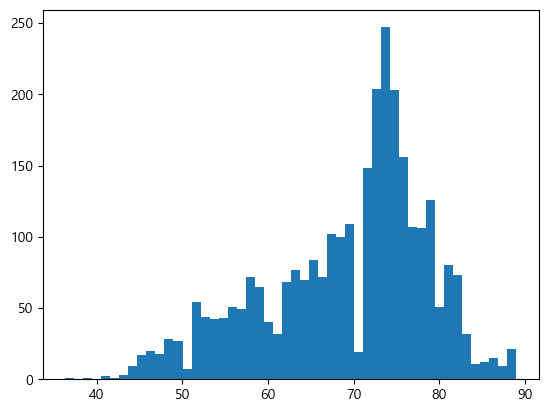

In [50]:
plt.hist(df['Life expectancy'], bins=50)
plt.show()

In [77]:
print(df['Life expectancy'].describe())
print('median: ', df['Life expectancy'].median())

# 위 분포도와 아래 통계치를 보니까 균등하게 분포되어 있으므로 별도로 변환을 거칠 필요 없어 보임

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy, dtype: float64
median:  72.1


In [78]:
df.nunique().sort_values()

# 값이 모두 동일한 열은 없음

Status                                2
Year                                 16
Polio                                73
Diphtheria                           81
Hepatitis B                          87
HIV/AIDS                            164
Schooling                           164
Country                             183
thinness  1-19 years                200
thinness 5-9 years                  207
infant deaths                       209
under-five deaths                   252
Life expectancy                     362
Adult Mortality                     400
Income composition of resources     576
BMI                                 602
Total expenditure                   816
Measles                             958
Alcohol                            1076
Population                         2277
percentage expenditure             2323
GDP                                2485
ID                                 2928
dtype: int64

In [79]:
# 결측치 개수 파악
df.isna().sum().sort_values(ascending=False)

Schooling                          1198
Income composition of resources    1025
HIV/AIDS                            915
Adult Mortality                     732
Population                          644
Hepatitis B                         553
GDP                                 443
Total expenditure                   226
Alcohol                             193
thinness 5-9 years                   32
thinness  1-19 years                 32
BMI                                  32
Polio                                19
Diphtheria                           19
ID                                    0
under-five deaths                     0
Country                               0
Measles                               0
percentage expenditure                0
infant deaths                         0
Status                                0
Year                                  0
Life expectancy                       0
dtype: int64

In [80]:
# 결측치가 존재하는 열 이름 확인
df.loc[:,  df.isna().sum() > 0 ].columns.values

array(['Adult Mortality', 'Alcohol', 'Hepatitis B', 'BMI', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'], dtype=object)

In [ ]:
!pip install missingno

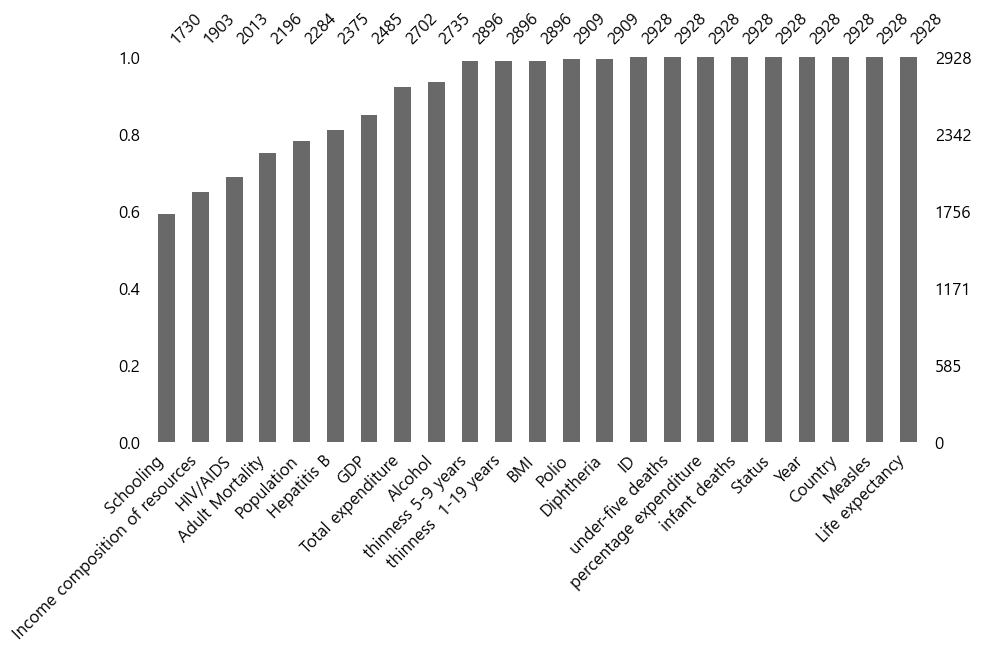

In [82]:
# 결측치가 많은 열은 Schooling, Income composition of resources, HIV/AIDS 순임
import missingno as msno
msno.bar(df, figsize=(10,5), fontsize=12, sort="ascending")
plt.show()

In [91]:
df2=df.copy()
df2

,ID,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,NaN,65.0
1,1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,NaN,612.696514,327582.0,17.5,17.5,NaN,10.0,59.9
2,2,Afghanistan,2013,Developing,NaN,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,3,Afghanistan,2012,Developing,NaN,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,NaN,59.5
4,4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,NaN,NaN,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2933,Zimbabwe,2004,Developing,NaN,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2924,2934,Zimbabwe,2003,Developing,NaN,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2925,2935,Zimbabwe,2002,Developing,NaN,25,4.43,0.000000,73.0,304,...,6.53,71.0,NaN,57.348340,125525.0,1.2,1.3,NaN,NaN,44.8
2926,2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,NaN,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [94]:
# Schooling의 경우 평균으로 대체
df2['Schooling'] = df2['Schooling'].fillna(value=df2['Schooling'].mean(numeric_only=True))
df2['Schooling'].describe()


count    2928.000000
mean       12.019827
std         2.551698
min         0.000000
25%        11.800000
50%        12.019827
75%        12.900000
max        20.700000
Name: Schooling, dtype: float64

In [119]:
# Income composition of resource 제거
df2 = df2.drop('Income composition of resources',axis=1)

In [120]:
df2.isna().sum()

ID                          0
Country                     0
Year                        0
Status                      0
Adult Mortality           732
infant deaths               0
Alcohol                   193
percentage expenditure      0
Hepatitis B               553
Measles                     0
BMI                        32
under-five deaths           0
Polio                      19
Total expenditure         226
Diphtheria                 19
HIV/AIDS                  915
GDP                       443
Population                644
thinness  1-19 years       32
thinness 5-9 years         32
Schooling                   0
Life expectancy             0
dtype: int64

In [122]:
# 결측치가 포함된 행 제거
df3 = df2.dropna(axis=0,how='any')

In [124]:
df3.isna().sum()

ID                        0
Country                   0
Year                      0
Status                    0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
Hepatitis B               0
Measles                   0
BMI                       0
under-five deaths         0
Polio                     0
Total expenditure         0
Diphtheria                0
HIV/AIDS                  0
GDP                       0
Population                0
thinness  1-19 years      0
thinness 5-9 years        0
Schooling                 0
Life expectancy           0
dtype: int64

In [126]:
df3.corr(numeric_only=True).round(3)

,ID,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Schooling,Life expectancy
ID,1.000,-0.003,0.097,-0.018,-0.077,-0.104,-0.015,-0.028,0.011,-0.011,-0.012,0.000,-0.074,0.140,-0.099,-0.024,-0.048,-0.008,-0.016,-0.106
Year,-0.003,1.000,-0.016,0.023,-0.115,0.065,0.103,-0.059,-0.039,0.027,-0.030,0.056,0.066,-0.075,0.086,0.004,0.051,0.053,0.054,0.008
Adult Mortality,0.097,-0.016,1.000,0.024,-0.188,-0.224,-0.152,-0.028,-0.370,0.045,-0.223,-0.083,-0.190,0.545,-0.249,-0.030,0.261,0.275,-0.357,-0.710
infant deaths,-0.018,0.023,0.024,1.000,-0.095,-0.089,-0.184,0.530,-0.236,0.996,-0.190,-0.154,-0.185,0.015,-0.096,0.575,0.411,0.425,-0.176,-0.186
Alcohol,-0.077,-0.115,-0.188,-0.095,1.000,0.390,0.085,-0.020,0.369,-0.088,0.250,0.213,0.236,-0.040,0.424,-0.016,-0.419,-0.400,0.471,0.423
percentage expenditure,-0.104,0.065,-0.224,-0.089,0.390,1.000,0.004,-0.056,0.252,-0.089,0.124,0.195,0.136,-0.088,0.953,-0.011,-0.245,-0.245,0.298,0.394
Hepatitis B,-0.015,0.103,-0.152,-0.184,0.085,0.004,1.000,-0.105,0.122,-0.196,0.457,0.082,0.594,-0.125,0.019,-0.109,-0.089,-0.100,0.135,0.211
Measles,-0.028,-0.059,-0.028,0.530,-0.020,-0.056,-0.105,1.000,-0.145,0.517,-0.064,-0.098,-0.081,-0.013,-0.057,0.253,0.143,0.145,-0.068,-0.072
BMI,0.011,-0.039,-0.370,-0.236,0.369,0.252,0.122,-0.145,1.000,-0.243,0.217,0.162,0.186,-0.216,0.273,-0.079,-0.545,-0.556,0.422,0.553
under-five deaths,-0.011,0.027,0.045,0.996,-0.088,-0.089,-0.196,0.517,-0.243,1.000,-0.207,-0.153,-0.202,0.027,-0.097,0.563,0.410,0.424,-0.183,-0.211


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


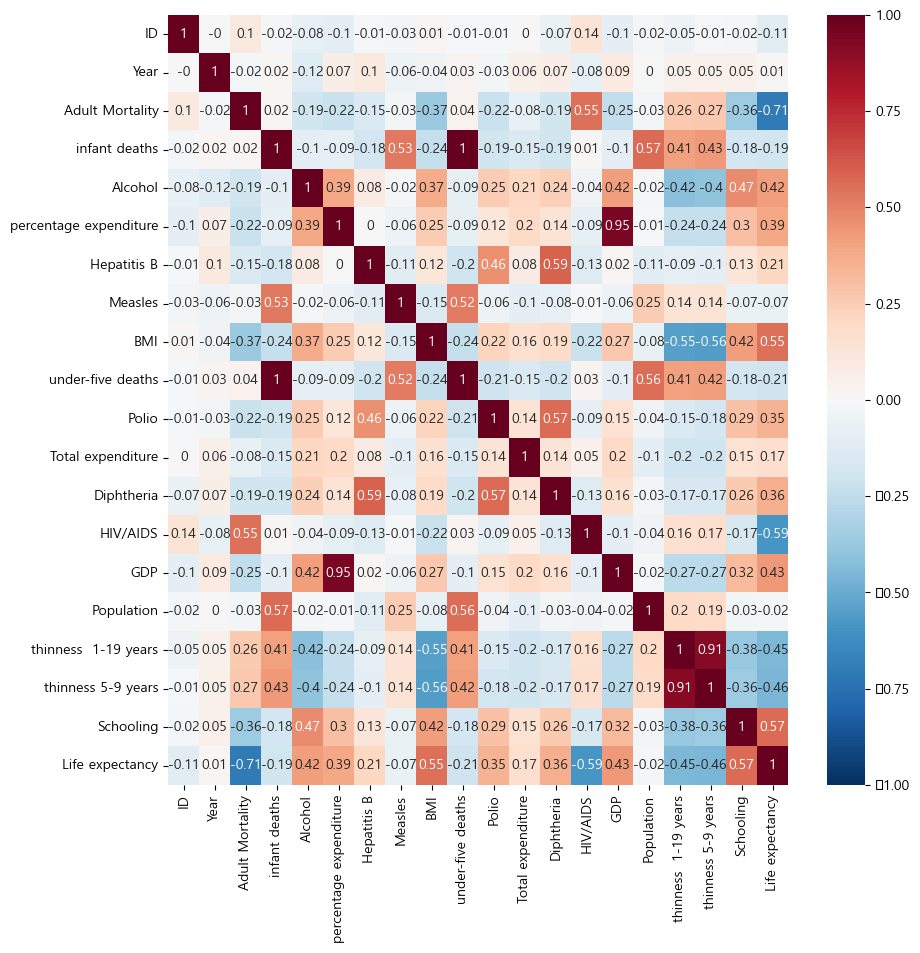

In [139]:
plt.figure(figsize=(10,10))
sns.heatmap(df3.corr(numeric_only=True).round(2), vmin=-1, cmap='RdBu_r', annot=True)
plt.show()

In [144]:
# 독립변수와 종속변수 간 선형관계 확인 결과 상관관계가 큰 독립 변수는 없음
B= df3.corr(numeric_only=True)['Life expectancy']
B = B.loc[B.index!='Life expectancy'].sort_values(ascending=False)
B

Schooling                 0.567939
BMI                       0.552931
GDP                       0.427782
Alcohol                   0.422975
percentage expenditure    0.394134
Diphtheria                0.362118
Polio                     0.354410
Hepatitis B               0.211408
Total expenditure         0.171627
Year                      0.008195
Population               -0.019390
Measles                  -0.071685
ID                       -0.106303
infant deaths            -0.186024
under-five deaths        -0.210780
thinness  1-19 years     -0.453151
thinness 5-9 years       -0.456989
HIV/AIDS                 -0.587067
Adult Mortality          -0.709715
Name: Life expectancy, dtype: float64

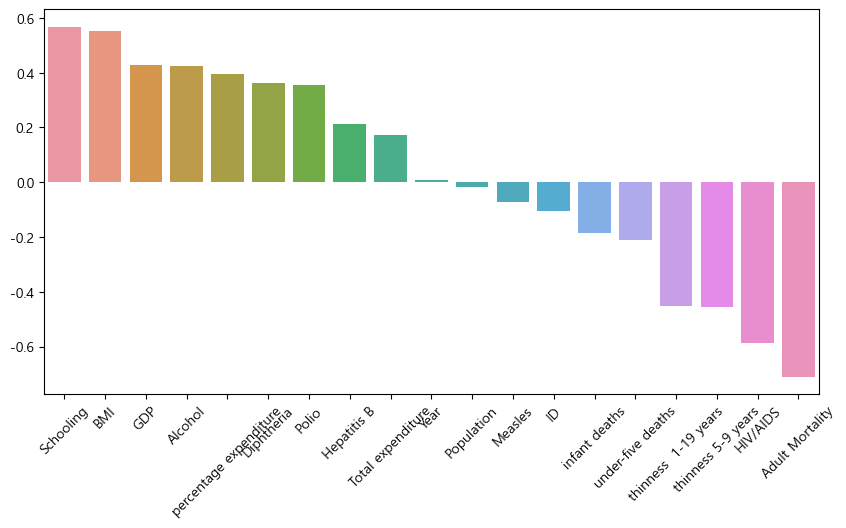

In [148]:
# 시각화(독립변수와 종속변수 간 선형관계)
plt.figure(figsize=(10,5))
sns.barplot(x=B.index, y=B.values)
plt.xticks(rotation=45)
plt.show()

In [154]:
#컬럼끼리 상관관계가 높아 보이는 거 제거
df4=df3.drop(['thinness 5-9 years', 'infant deaths', 'percentage expenditure'], axis=1)

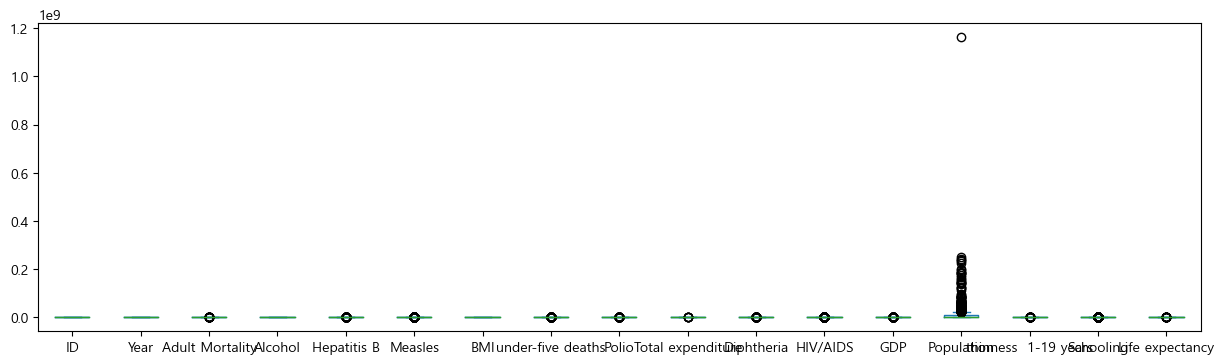

In [160]:
# 이상치 파악

df4.plot.box(figsize=(15,4))

plt.show()

<AxesSubplot: >

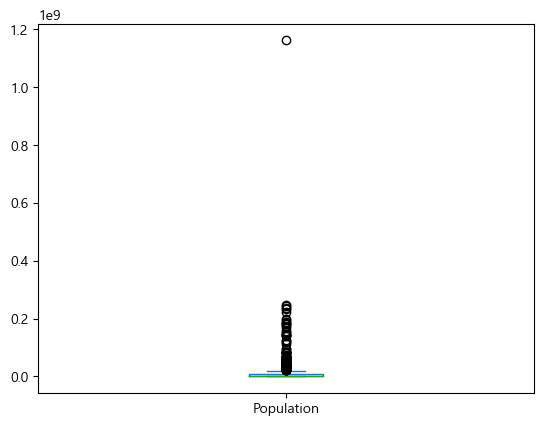

In [161]:
# Population에 경우 이상치가 너무 많음
df4['Population'].plot.box()

In [181]:
df4.shape

(859, 19)

In [182]:
# Turkey Fence 활용 : 제거되는 행은 113개(전체 행 개수에 10%) 정도이므로 해당 행 제거
Q1, Q3 = df4['Population'].quantile([0.25, 0.75]) # 이상치 제거하고자 하는 열 입력
IQR = Q3-Q1
lower_f = Q1 - 1.5*IQR
upper_f = Q3 + 1.5*IQR
outlier = df4.loc[(df4['Population'] < lower_f) | (df4['Population'] > upper_f), :]
outlier.shape 

(113, 19)

In [183]:
df5=df4.drop(outlier.index, axis=0)
df5.shape

(746, 19)

<AxesSubplot: >

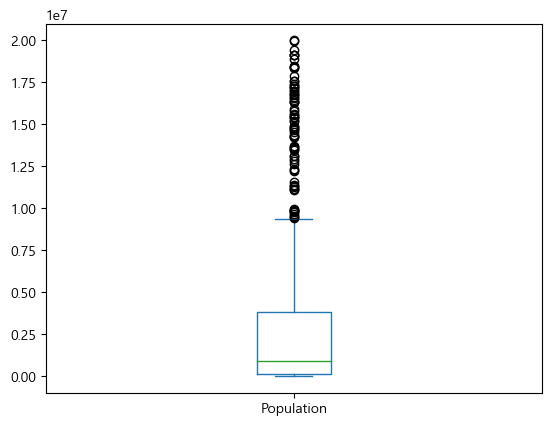

In [184]:
df5['Population'].plot.box()

In [185]:
#범주형 자료 분석(국가, 국가 상태)

def statistical_test(mode, df, cat, target):
    uniques= df[cat].unique()    
    if mode == 't':   # 범주가 1개, 2개 일때 사용 - 범주별 평균의 차이가 유의미한가? (성별에 따른 키 평균)
        group = df.groupby(cat)[target]
        samples = [group.get_group(i) for i in uniques]
        value, p = stats.ttest_ind(*samples)        
    elif mode == 'f':   # 범주가 3개 이상일 때 사용 - 범주별 평균의 차이가 유의미한가? (혈액형에 따른 키 평균)
        group = df.groupby(cat)[target]
        samples = [group.get_group(i) for i in uniques]
        value, p = stats.f_oneway(*samples)
    elif mode == 'c':   # 두 개 범주가 독립성을 갖는지 아닌지? (가사노동의 종류와 구성원은 독립적? 연관성?)
        contingency = pd.crosstab(index=df[cat], columns=df[target])
        value, p, df, expected = stats.chi2_contingency(contingency)
        
    return value, p, 'Statistically Signifcant' if p<=0.05 else 'Statistically Insignifcant'

In [186]:
statistical_test('t', df5, 'Status', 'Life expectancy')

# 통계적으로 유의미함

(-13.729356643007531, 2.125698216056497e-38, 'Statistically Signifcant')

In [187]:
statistical_test('f', df5, 'Country', 'Life expectancy')

# 통계적으로 유의미함

(76.97402382371968, 5.53677998066083e-310, 'Statistically Signifcant')

In [188]:
# object type 변환
df5 = pd.get_dummies(df5, columns=['Country', 'Status'])

In [189]:
df5

,ID,Year,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,...,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
4,4,2011,275.0,0.01,68.0,3013,17.2,97,68.0,7.87,...,0,0,0,0,0,0,0,0,0,1
5,5,2010,279.0,0.01,66.0,1989,16.7,102,66.0,9.20,...,0,0,0,0,0,0,0,0,0,1
10,10,2005,291.0,0.02,66.0,1296,14.2,118,58.0,8.70,...,0,0,0,0,0,0,0,0,0,1
12,12,2003,295.0,0.01,65.0,798,13.4,122,41.0,8.82,...,0,0,0,0,0,0,0,0,0,1
14,14,2001,316.0,0.01,63.0,8762,12.6,122,35.0,7.80,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2928,2009,587.0,4.64,73.0,853,29.0,45,69.0,6.26,...,0,0,0,0,0,0,0,1,0,1
2919,2929,2008,632.0,3.56,75.0,0,28.6,46,75.0,4.96,...,0,0,0,0,0,0,0,1,0,1
2921,2931,2006,7.0,4.57,68.0,212,27.9,45,71.0,5.12,...,0,0,0,0,0,0,0,1,0,1
2922,2932,2005,717.0,4.14,65.0,420,27.5,43,69.0,6.44,...,0,0,0,0,0,0,0,1,0,1


In [219]:
# 독립/종속 변수 분리

X = df5.iloc[:, :-1]
Y = df5.iloc[:, -1] 
print(X.shape, Y.shape)

(746, 149) (746,)


In [220]:
# 정규화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [221]:
# Test/Train Data Split
A = train_test_split(X_scaled, Y, random_state=0, test_size=0.20)
x_train, x_test, y_train, y_test = A
[x.shape for x in [x_train, x_test, y_train, y_test]]  #데이터 분할된 비율이 제대로 됐는지 확인 목적

[(596, 149), (150, 149), (596,), (150,)]

In [256]:
from sklearn.metrics import mean_squared_error

def print_errors(model, X_test, y_test):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred) #작을수록 좋음
    rmse = mse**0.5  # MSE의 제곱근 값
    print(f'MSE:{mse:.3f}, RMSE:{rmse:.3f}')

In [223]:
# Test Score 기준 가장 좋은 알고리즘 출력 함수 설정(input: 모델명, TrainScore, TestScore)

Best_Algorithm = {'Algorithm': 'name', 'TrainScore': 0, 'TestScore': 0}
Name = []
TrainScore = [] #각각의 Score를 알고리즘 별로 수집해놓기
TestScore = []

def BestAlgorithm(name, trainScore, testScore):
    print("현재까지 Best Algorithm")
    if Best_Algorithm['TestScore'] < testScore:
        Best_Algorithm['Algorithm'] = name
        Best_Algorithm['TrainScore'] = trainScore
        Best_Algorithm['TestScore'] = testScore
    
    Name.append(name)
    TrainScore.append(trainScore)
    TestScore.append(testScore)
    
    return Best_Algorithm

In [224]:
# Linear Regression
model_LR = LinearRegression().fit(x_train, y_train)

trainScore_LR = round(model_LR.score(x_train, y_train),3)
testScore_LR = round(model_LR.score(x_test, y_test),3)

print(f'train score : {trainScore_LR:.3f}')
print(f'test score  : {testScore_LR:.3f}')

BestAlgorithm('LR', trainScore_LR, testScore_LR)

train score : 1.000
test score  : 0.945
현재까지 Best Algorithm


{'Algorithm': 'LR', 'TrainScore': 1.0, 'TestScore': 0.945}

In [257]:
print_errors(model_LR, x_test, y_test)

MSE:0.007, RMSE:0.083


In [258]:
# Polynomial Features(2차)

P = PolynomialFeatures(degree = degree)
x_poly = P.fit_transform(X_scaled)

model_LR2 = LinearRegression().fit(x_train, y_train)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_poly, Y, random_state = 0, test_size=0.2)

trainScore_LR2 = round(model_LR2.score(x_train, y_train),3)
testScore_LR2 = round(model_LR2.score(x_test, y_test),3)

print(f'train score : {trainScore_LR2:.3f}')
print(f'test score  : {testScore_LR2:.3f}')

BestAlgorithm('LR2', trainScore_LR2, testScore_LR2)

train score : 1.000
test score  : 0.945
현재까지 Best Algorithm


{'Algorithm': 'DTR', 'TrainScore': 1.0, 'TestScore': 1.0}

In [259]:
print_errors(model_LR2, x_test, y_test)

MSE:0.007, RMSE:0.083


In [260]:
# Polynomial Features(3차)
degree=3

P = PolynomialFeatures(degree = degree)
x_poly = P.fit_transform(X_scaled)

model_LR3 = LinearRegression().fit(x_train, y_train)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_poly, Y, random_state = 0, test_size=0.2)

trainScore_LR3 = round(model_LR3.score(x_train, y_train),3)
testScore_LR3 = round(model_LR3.score(x_test, y_test),3)

print(f'train score : {trainScore_LR3:.3f}')
print(f'test score  : {testScore_LR3:.3f}')

BestAlgorithm('LR3', trainScore_LR3, testScore_LR3)

train score : 1.000
test score  : 0.945
현재까지 Best Algorithm


{'Algorithm': 'DTR', 'TrainScore': 1.0, 'TestScore': 1.0}

In [261]:
print_errors(model_LR3, x_test, y_test)

MSE:0.007, RMSE:0.083


In [ ]:
# Linear Regression 기법으로는 차수가 올라가도 Score 변화 작음

trainScore : 0.9899741200828157
testScore : 0.9728338068181818


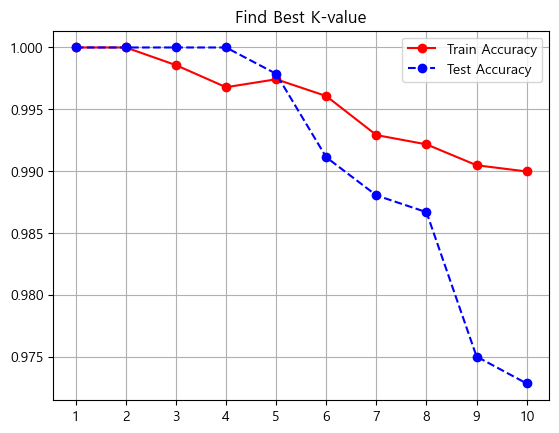

현재까지 Best Algorithm


{'Algorithm': 'KNN',
 'TrainScore': 0.9899741200828157,
 'TestScore': 0.9728338068181818}

In [226]:
# KNN Regressor

model_knn = KNeighborsRegressor().fit(x_train, y_train)
x_train_k, x_test_k, y_train_k, y_test_k = train_test_split(X_scaled, Y, random_state=0, test_size=0.2)

k_range = range(1, 11)
train_score = []
test_score = []

Max_test = 0 

for k in k_range:
    model_knn = KNeighborsRegressor(n_neighbors=k).fit(x_train_k, y_train_k)
    trainScore_k = model_knn.score(x_train_k, y_train_k)
    testScore_k = model_knn.score(x_test_k, y_test_k)
    
    if testScore_k > Max_test:
        good_train = trainScore_k
        good_test = testScore_k
        good_k = k
        
    train_score.append(trainScore_k)
    test_score.append(testScore_k)

print(f'trainScore : {good_train}')
print(f'testScore : {good_test}')

# kNN 시각화
plt.plot(k_range, train_score, 'ro-', label='Train Accuracy')
plt.plot(k_range, test_score, 'bo--', label='Test Accuracy')
plt.xticks(k_range)
plt.title('Find Best K-value')
plt.legend(loc='best')
plt.grid(True)
plt.show()

BestAlgorithm('KNN', trainScore_k, testScore_k)
# k=5일 때가 가장 좋아보이며 과적합이 다소 해결됨

In [262]:
print_errors(model_knn, x_test, y_test)

MSE:0.003, RMSE:0.058


In [227]:
#Ridge Model
model_RD = Ridge(alpha=1, tol = 0.001).fit(x_train, y_train)

# 성능 평가
trainScore_rd = round(model_RD.score(x_train, y_train),3)
testScore_rd = round(model_RD.score(x_test, y_test),3)

print(f'trainScore : {trainScore_rd}')
print(f'testScore : {testScore_rd}')

trainScore : 1.0
testScore : 0.981


In [228]:
#GridSearchCV 활용
params_RD = {'alpha': [0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0],
             'tol': [0.0005, 0.001, 0.0015, 0.002, 0.003, 0.005, 0.01, 0.2, 0.3]}
grid_RD = GridSearchCV(model_RD, params_RD, cv=3).fit(x_train, y_train)

print(grid_RD.best_params_)  #가장 점수가 높은 hyper parameter
model_RD = grid_RD.best_estimator_ # 가장 점수가 좋은 hyper parameter로 모델 재설정

trainScore_RD = round(model_RD.score(x_train, y_train),3)
testScore_RD = round(model_RD.score(x_test, y_test),3)

print(f'train score : {trainScore_RD:.3f}')
print(f'test score  : {testScore_RD:.3f}')

BestAlgorithm('RD',trainScore_RD, testScore_RD)

{'alpha': 3.0, 'tol': 0.0005}
train score : 1.000
test score  : 0.982
현재까지 Best Algorithm


{'Algorithm': 'RD', 'TrainScore': 1.0, 'TestScore': 0.982}

In [263]:
print_errors(model_RD, x_test, y_test)

MSE:0.002, RMSE:0.048


In [229]:
#Lasso Model
model_ls = Ridge(alpha=1, tol = 0.001).fit(x_train, y_train)

# 성능 평가
trainScore_ls = round(model_ls.score(x_train, y_train),3)
testScore_ls = round(model_ls.score(x_test, y_test),3)

print(f'trainScore : {trainScore_ls}')
print(f'testScore : {testScore_ls}')

trainScore : 1.0
testScore : 0.981


In [230]:
#GridSearchCV 활용
params_ls = {'alpha': [0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0],
             'tol': [0.0005, 0.001, 0.0015, 0.002, 0.003, 0.005, 0.01, 0.2, 0.3]}
grid_ls = GridSearchCV(model_ls, params_ls, cv=3).fit(x_train, y_train)

print(grid_ls.best_params_)  #가장 점수가 높은 hyper parameter
model_ls = grid_ls.best_estimator_ # 가장 점수가 좋은 hyper parameter로 모델 재설정

trainScore_ls = round(model_ls.score(x_train, y_train),3)
testScore_ls = round(model_ls.score(x_test, y_test),3)

print(f'train score : {trainScore_ls:.3f}')
print(f'test score  : {testScore_ls:.3f}')

BestAlgorithm('Lasso',trainScore_ls, testScore_ls)

{'alpha': 3.0, 'tol': 0.0005}
train score : 1.000
test score  : 0.982
현재까지 Best Algorithm


{'Algorithm': 'RD', 'TrainScore': 1.0, 'TestScore': 0.982}

In [264]:
print_errors(model_ls, x_test, y_test)

MSE:0.002, RMSE:0.048


In [231]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model_DTR = DecisionTreeRegressor(max_depth = None, min_samples_split = 2).fit(x_train, y_train)

# 성능 평가
trainScore_DTR = round(model_DTR.score(x_train, y_train),3)
testScore_DTR = round(model_DTR.score(x_test, y_test),3)

print(f'trainScore : {trainScore_DTR}')
print(f'testScore : {testScore_DTR}')

trainScore : 1.0
testScore : 1.0


In [232]:
# GridSearchCV를 통한 Tuning

params_DTR = {'max_depth': list(np.arange(2, 15, 1)),
             'min_samples_split': list(np.arange(2, 10, 1))}

grid_DTR = GridSearchCV(model_DTR, params_DTR, cv=3).fit(x_train, y_train)

print(grid_DTR.best_params_)
model_DTR = grid_DTR.best_estimator_

trainScore_DTR = round(model_DTR.score(x_train, y_train),3)
testScore_DTR = round(model_DTR.score(x_test, y_test),3)

print(f'trainScore : {trainScore_DTR}')
print(f'testScore : {testScore_DTR}')

BestAlgorithm('DTR',trainScore_DTR, testScore_DTR) 

{'max_depth': 2, 'min_samples_split': 2}
trainScore : 1.0
testScore : 1.0
현재까지 Best Algorithm


{'Algorithm': 'DTR', 'TrainScore': 1.0, 'TestScore': 1.0}

In [265]:
print_errors(model_DTR, x_test, y_test)

MSE:0.000, RMSE:0.000


In [233]:
# Random Forest Regressor
model_RFR = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2).fit(x_train, y_train)

trainScore_RFR = round(model_RFR.score(x_train, y_train),3)
testScore_RFR = round(model_RFR.score(x_test, y_test),3)

print(f'trainScore : {trainScore_RFR}')
print(f'testScore : {testScore_RFR}')

trainScore : 1.0
testScore : 1.0


In [235]:
# GridSearchCV를 통한 Tuning

params_RFR = {'max_depth': list(np.arange(2, 15, 1)),
             'min_samples_split': list(np.arange(2, 10, 1))}

grid_RFR = GridSearchCV(model_RFR, params_RFR, cv=3).fit(x_train, y_train)

print(grid_RFR.best_params_)
model_RFR = grid_RFR.best_estimator_

trainScore_RFR = round(model_RFR.score(x_train, y_train),3)
testScore_RFR = round(model_RFR.score(x_test, y_test),3)

print(f'trainScore : {trainScore_RFR}')
print(f'testScore : {testScore_RFR}')

BestAlgorithm('RFR',trainScore_RFR, testScore_RFR) 

{'max_depth': 2, 'min_samples_split': 2}
trainScore : 1.0
testScore : 1.0
현재까지 Best Algorithm


{'Algorithm': 'DTR', 'TrainScore': 1.0, 'TestScore': 1.0}

In [236]:
# Gradient Boosting Regressor
model_GBR = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3).fit(x_train, y_train)

trainScore_GBR = round(model_GBR.score(x_train, y_train),3)
testScore_GBR = round(model_GBR.score(x_test, y_test),3)

print(f'trainScore : {trainScore_GBR}')
print(f'testScore : {testScore_GBR}')

trainScore : 1.0
testScore : 1.0


In [237]:
# GridSearchCV를 통한 Tuning

params_GBR = {'learning_rate': [0.01, 0.1, 1], # default
              'n_estimators': list(np.arange(100, 400, 100)),
             'max_depth': list(np.arange(3, 6, 1))}
grid_GBR = GridSearchCV(model_GBR, params_GBR, cv=3).fit(x_train, y_train)

print(grid_GBR.best_params_)
model_GBR = grid_GBR.best_estimator_

trainScore_GBR = round(model_GBR.score(x_train, y_train),3)
testScore_GBR = round(model_GBR.score(x_test, y_test),3)

print(f'trainScore : {trainScore_GBR}')
print(f'testScore : {testScore_GBR}')

BestAlgorithm('GBR',trainScore_GBR, testScore_GBR) 

{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 100}
trainScore : 1.0
testScore : 1.0
현재까지 Best Algorithm


{'Algorithm': 'DTR', 'TrainScore': 1.0, 'TestScore': 1.0}

In [238]:
# XGB Regressor
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.4, max_depth=3, objective ='reg:squarederror').fit(x_train, y_train)

trainScore_xgb = model_xgb.score(x_train, y_train)
testScore_xgb = model_xgb.score(x_test, y_test)

print(f'trainScore : {trainScore_xgb}')
print(f'testScore : {testScore_xgb}')

trainScore : 0.9999999878903243
testScore : 0.9999999878845848


In [239]:
# GridSearchCV를 통한 Tuning

params_xgb = {'learning_rate': [0.01, 0.1, 1], # default
              'n_estimators': list(np.arange(100, 400, 100)),
             'max_depth': list(np.arange(3, 6, 1))}
grid_xgb = GridSearchCV(model_xgb, params_xgb, cv=3).fit(x_train, y_train)

print(grid_xgb.best_params_)
model_xgb = grid_xgb.best_estimator_

trainScore_xgb = round(model_xgb.score(x_train, y_train),3)
testScore_xgb = round(model_xgb.score(x_test, y_test),3)

print(f'trainScore : {trainScore_xgb}')
print(f'testScore : {testScore_xgb}')

BestAlgorithm('XGB',trainScore_xgb, testScore_xgb) 

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
trainScore : 1.0
testScore : 1.0
현재까지 Best Algorithm


{'Algorithm': 'DTR', 'TrainScore': 1.0, 'TestScore': 1.0}

In [249]:
# Light GBM Regressor
model_lgbm = LGBMRegressor(n_estimators=2000, max_depth=3, num_leaves=31, min_data_in_leaf=20).fit(x_train, y_train)  

trainScore_lgbm = model_lgbm.score(x_train, y_train)
testScore_lgbm = model_lgbm.score(x_test, y_test)

print(f'trainScore : {trainScore_lgbm}')
print(f'testScore : {testScore_lgbm}')

BestAlgorithm('LGBM',trainScore_lgbm, testScore_lgbm) 

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
trainScore : 1.0
testScore : 1.0
현재까지 Best Algorithm


{'Algorithm': 'DTR', 'TrainScore': 1.0, 'TestScore': 1.0}

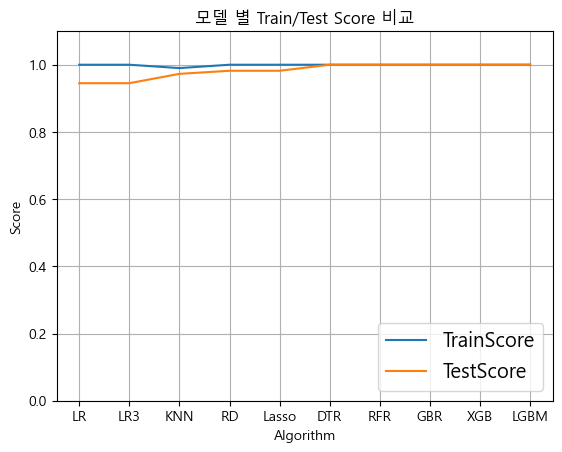

DTR      1.000000
RFR      1.000000
GBR      1.000000
XGB      1.000000
LGBM     1.000000
RD       0.982000
Lasso    0.982000
KNN      0.972834
LR       0.945000
LR3      0.945000
dtype: float64

In [250]:
# 가장 좋은 알고리즘 시각화

plt.plot(Name, TrainScore, label='TrainScore')
plt.plot(Name, TestScore, label='TestScore')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid()
plt.title('모델 별 Train/Test Score 비교')
plt.legend(loc='lower right',fontsize='x-large')
plt.show()

# TestScore 내림차순 정렬
df=pd.Series(TestScore, Name)
df.sort_values(ascending=False)